In [1]:
# import all the basic libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Load the datasets
datasets=pd.read_csv("E:\Data science materials\Real_world_projects\churn_modelling\data_regression.csv")

In [3]:
# making a copy of the data
df=datasets.copy()

In [4]:
df.head()

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0


In [5]:
target=df['churn']

# Data cleaning

In [6]:
#Pre-processesing
# 1.Handling the missing value
# 2.Handling the outlier(transformation or regularisation)
# 3.Handling encoding part (label encoder,one-hot encoder,dummy)
# 4.Feature scaling (standardisation, normalisation)
# 5.Handing imbalanced datasets

In [7]:
# checking the null values
df.isnull().sum()

year                       0
customer_id                0
phone_no                   0
gender                    24
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     28
customer_support_calls     0
churn                     35
dtype: int64

<AxesSubplot:>

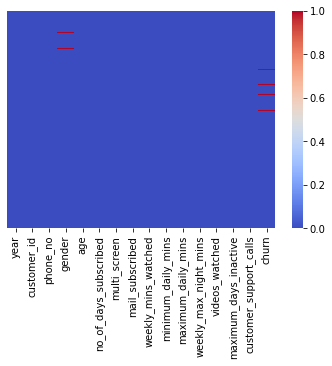

In [8]:
# visulisation for the null values
sns.heatmap(df.isnull(),yticklabels=False,cmap='coolwarm')

In [9]:
#gender , maximum_days_inactive , churn have null values

In [10]:
df['gender'].value_counts()

Male      1053
Female     923
Name: gender, dtype: int64

In [11]:
# we will replace the null values with Male 
df['gender']=df['gender'].fillna('Male')

In [12]:
df['maximum_days_inactive'].value_counts()

3.0    945
4.0    645
2.0    273
5.0     85
1.0     12
0.0     10
6.0      2
Name: maximum_days_inactive, dtype: int64

In [13]:
# we will replace the null values with the 3.0
df['maximum_days_inactive']=df['maximum_days_inactive'].fillna('3.0')

In [14]:
df['churn'].value_counts()

0.0    1703
1.0     262
Name: churn, dtype: int64

In [15]:
df['churn']=df['churn'].fillna(0.0)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    2000 non-null   int64  
 1   customer_id             2000 non-null   int64  
 2   phone_no                2000 non-null   object 
 3   gender                  2000 non-null   object 
 4   age                     2000 non-null   int64  
 5   no_of_days_subscribed   2000 non-null   int64  
 6   multi_screen            2000 non-null   object 
 7   mail_subscribed         2000 non-null   object 
 8   weekly_mins_watched     2000 non-null   float64
 9   minimum_daily_mins      2000 non-null   float64
 10  maximum_daily_mins      2000 non-null   float64
 11  weekly_max_night_mins   2000 non-null   int64  
 12  videos_watched          2000 non-null   int64  
 13  maximum_days_inactive   2000 non-null   object 
 14  customer_support_calls  2000 non-null   

In [17]:
# checking the duplicated data
df.loc[df.duplicated(),:]

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn


In [18]:
# No duplicate data is present in the datasets

<AxesSubplot:>

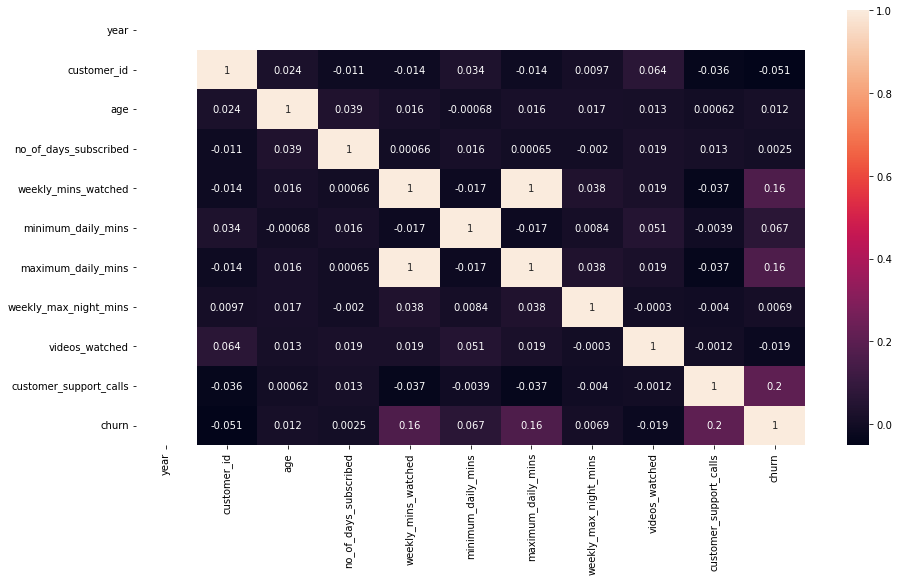

In [19]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True)

##  Dropping the Column

In [20]:
df=df.drop(['year','customer_id','phone_no'],axis=1)

In [21]:
df.head()

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0


# EDA 

In [22]:
numeric_data=df.select_dtypes(include='number')
char_data=df.select_dtypes(include='object')

In [23]:
char_data.head()

,gender,multi_screen,mail_subscribed,maximum_days_inactive
0,Female,no,no,4.0
1,Female,no,no,3.0
2,Female,no,no,4.0
3,Female,no,yes,3.0
4,Female,no,no,3.0


In [24]:
char=pd.concat([char_data,target],axis=1)

In [25]:
char.head()

,gender,multi_screen,mail_subscribed,maximum_days_inactive,churn
0,Female,no,no,4.0,0.0
1,Female,no,no,3.0,0.0
2,Female,no,no,4.0,1.0
3,Female,no,yes,3.0,0.0
4,Female,no,no,3.0,0.0


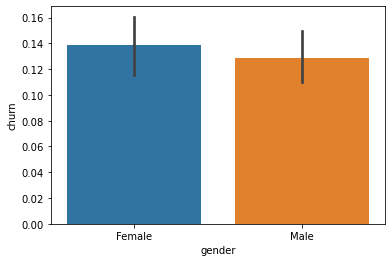

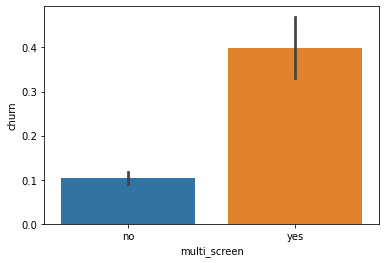

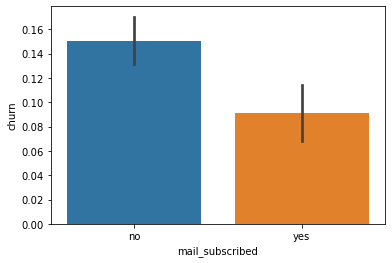

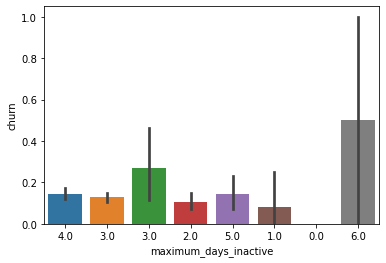

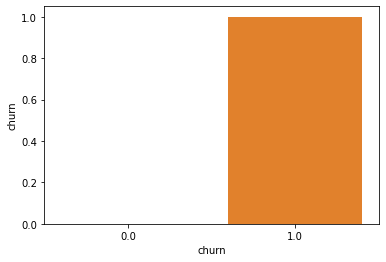

In [26]:
for col in (char.columns):
    plt.figure()
    sns.barplot(x=col,y='churn',data=char)
plt.show()

In [27]:
numeric_data.head()

,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,customer_support_calls,churn
0,36,62,148.35,12.2,16.81,82,1,1,0.0
1,39,149,294.45,7.7,33.37,87,3,2,0.0
2,65,126,87.30,11.9,9.89,91,1,5,1.0
3,24,131,321.30,9.5,36.41,102,4,3,0.0
4,40,191,243.00,10.9,27.54,83,7,1,0.0


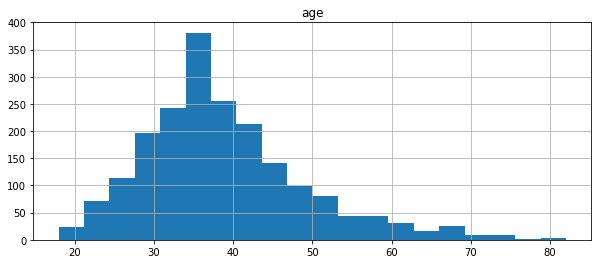

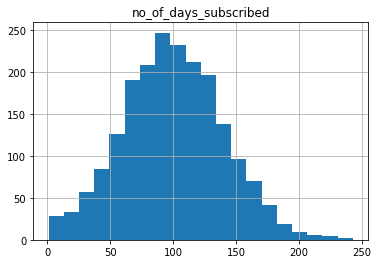

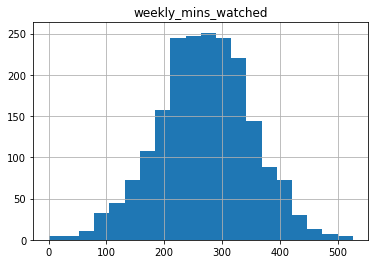

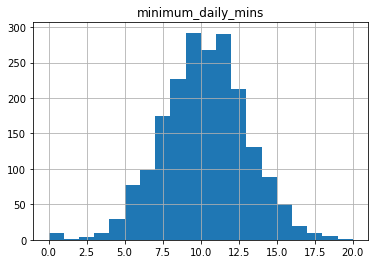

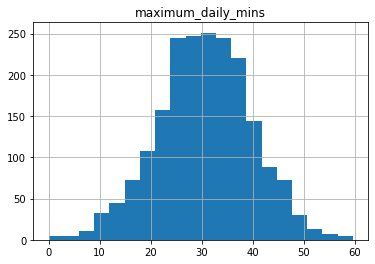

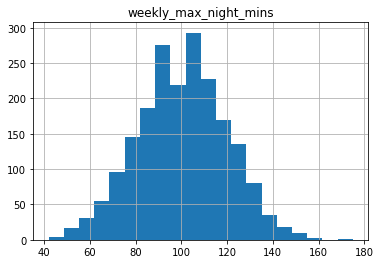

In [35]:
# Let's plot some histograms for the continuous variable
continous_var=['age','no_of_days_subscribed','weekly_mins_watched','minimum_daily_mins','maximum_daily_mins',
              'weekly_max_night_mins']

plt.figure(figsize=(10,4))
for i in continous_var:
    numeric_data[i].hist(bins=20)
    plt.title(i)
    plt.show()

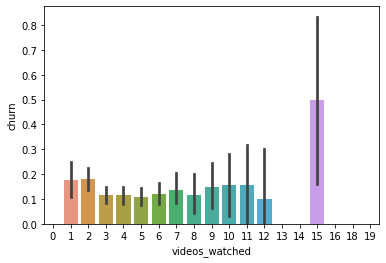

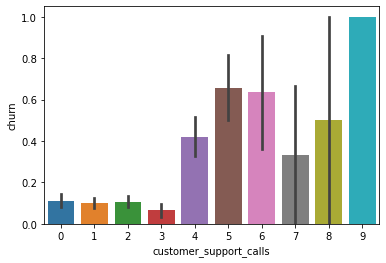

In [36]:
numeric_discrete_var=['videos_watched','customer_support_calls']
for i in numeric_discrete_var:
    plt.figure()
    sns.barplot(x=i,y='churn',data=numeric_data)
plt.show()

## One-hot encoding 

In [37]:
df['multi_screen']=df['multi_screen'].astype('category')
df['multi_screen']=df['multi_screen'].cat.codes
df=pd.get_dummies(df,columns=['multi_screen'],drop_first=True)

In [38]:
df['gender']=df['gender'].astype('category')
df['gender']=df['gender'].cat.codes
df=pd.get_dummies(df,columns=['gender'],drop_first=True)

In [39]:
df['mail_subscribed']=df['mail_subscribed'].astype('category')
df['mail_subscribed']=df['mail_subscribed'].cat.codes
df=pd.get_dummies(df,columns=['mail_subscribed'],drop_first=True)

In [40]:
df['maximum_days_inactive']=df['maximum_days_inactive'].astype('category')
df['maximum_days_inactive']=df['maximum_days_inactive'].cat.codes
df=pd.get_dummies(df,columns=['maximum_days_inactive'],drop_first=True)

In [41]:
pd.set_option('display.max_columns', None)
df.head()

,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,customer_support_calls,churn,multi_screen_1,gender_1,mail_subscribed_1,maximum_days_inactive_1,maximum_days_inactive_2,maximum_days_inactive_3,maximum_days_inactive_4,maximum_days_inactive_5,maximum_days_inactive_6,maximum_days_inactive_7
0,36,62,148.35,12.2,16.81,82,1,1,0.0,0,0,0,0,0,0,1,0,0,0
1,39,149,294.45,7.7,33.37,87,3,2,0.0,0,0,0,0,0,1,0,0,0,0
2,65,126,87.30,11.9,9.89,91,1,5,1.0,0,0,0,0,0,0,1,0,0,0
3,24,131,321.30,9.5,36.41,102,4,3,0.0,0,0,1,0,0,1,0,0,0,0
4,40,191,243.00,10.9,27.54,83,7,1,0.0,0,0,0,0,0,1,0,0,0,0


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      2000 non-null   int64  
 1   no_of_days_subscribed    2000 non-null   int64  
 2   weekly_mins_watched      2000 non-null   float64
 3   minimum_daily_mins       2000 non-null   float64
 4   maximum_daily_mins       2000 non-null   float64
 5   weekly_max_night_mins    2000 non-null   int64  
 6   videos_watched           2000 non-null   int64  
 7   customer_support_calls   2000 non-null   int64  
 8   churn                    2000 non-null   float64
 9   multi_screen_1           2000 non-null   uint8  
 10  gender_1                 2000 non-null   uint8  
 11  mail_subscribed_1        2000 non-null   uint8  
 12  maximum_days_inactive_1  2000 non-null   uint8  
 13  maximum_days_inactive_2  2000 non-null   uint8  
 14  maximum_days_inactive_3 

In [43]:
# checking the imbalance data
df['churn'].value_counts()

0.0    1738
1.0     262
Name: churn, dtype: int64

In [44]:
# AS 2*minority  < majority , means the data is imbalance data
# Here if we balance the data , then it will 50% 0.0 and 50% 1.0 which will affect accuracy metrics as 
# well as production performance.

In [45]:
df.describe()

,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,customer_support_calls,churn,multi_screen_1,gender_1,mail_subscribed_1,maximum_days_inactive_1,maximum_days_inactive_2,maximum_days_inactive_3,maximum_days_inactive_4,maximum_days_inactive_5,maximum_days_inactive_6,maximum_days_inactive_7
count,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.00000
mean,38.69050,99.750000,270.178425,10.198700,30.620780,100.415500,4.482500,1.547000,0.131000,0.099000,0.53850,0.285000,0.006000,0.136500,0.472500,0.32250,0.042500,0.001000,0.01400
std,10.20641,39.755386,80.551627,2.785519,9.129165,19.529454,2.487728,1.315164,0.337485,0.298737,0.49864,0.451527,0.077246,0.343405,0.499368,0.46755,0.201777,0.031615,0.11752
min,18.00000,1.000000,0.000000,0.000000,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000
25%,32.00000,73.000000,218.212500,8.400000,24.735000,87.000000,3.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000
50%,37.00000,99.000000,269.925000,10.200000,30.590000,101.000000,4.000000,1.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000
75%,44.00000,127.000000,324.675000,12.000000,36.797500,114.000000,6.000000,2.000000,0.000000,0.000000,1.00000,1.000000,0.000000,0.000000,1.000000,1.00000,0.000000,0.000000,0.00000
max,82.00000,243.000000,526.200000,20.000000,59.640000,175.000000,19.000000,9.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000


## Split the data

In [46]:
df.shape

(2000, 19)

In [47]:
X=df.drop(['churn'],axis=1)
y=df['churn']

## split train-test data

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=101,train_size=0.8)

In [49]:
print(X_train.shape)
print(X_test.shape)

(1600, 18)
(400, 18)


# model selection

## Decision Tree

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
grid={'max_depth':[2,3,4,5,6,7],'min_samples_split':[2,3,4,5,6,7]}
cv=KFold(n_splits=10,random_state=None,shuffle=False)
dt_model=DecisionTreeClassifier()

In [51]:
from sklearn.model_selection import GridSearchCV
dt=GridSearchCV(dt_model,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
dt.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 4, 5, 6, 7]},
             scoring='f1_macro')

In [52]:
# checking accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred_dt=dt.predict(X_test)
y_pred_dt_train=dt.predict(X_train)

In [53]:
print(accuracy_score(y_train,y_pred_dt_train))
print("************")
print(accuracy_score(y_test,y_pred_dt))

0.9525
************
0.9075


In [54]:
# confusion metrics
print(confusion_matrix(y_test,y_pred_dt))

[[335  12]
 [ 25  28]]


In [55]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95       347
         1.0       0.70      0.53      0.60        53

    accuracy                           0.91       400
   macro avg       0.82      0.75      0.77       400
weighted avg       0.90      0.91      0.90       400



In [56]:
from sklearn.metrics import precision_score
print(precision_score(y_test,y_pred_dt))
print(precision_score(y_train,y_pred_dt_train))

0.7
0.9290322580645162


In [57]:
from sklearn.metrics import f1_score
print(f1_score(y_test,y_pred_dt))
print(f1_score(y_train,y_pred_dt_train))

0.6021505376344085
0.7912087912087912


## Random forest


In [58]:
from sklearn.ensemble import RandomForestClassifier
grid={'max_depth':[2,3,4,5,6,7],'min_samples_split':[2,3,4,5,6,7]}
cv=KFold(n_splits=10,random_state=None,shuffle=False)
rf=RandomForestClassifier()


In [59]:
rf=GridSearchCV(rf,grid,n_jobs=-1,scoring='f1_macro',cv=cv)
rf.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 4, 5, 6, 7]},
             scoring='f1_macro')

In [60]:
y_pred_rf=rf.predict(X_test)
y_pred_rf_train=rf.predict(X_train)

In [61]:
# Accuracy
print(accuracy_score(y_train,y_pred_rf_train))
print("*****************")
print(accuracy_score(y_test,y_pred_rf))

0.94875
*****************
0.9075


In [62]:
# confusion metrix
print(confusion_matrix(y_test,y_pred_rf))

[[346   1]
 [ 36  17]]


In [63]:
# classificatio report
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95       347
         1.0       0.94      0.32      0.48        53

    accuracy                           0.91       400
   macro avg       0.93      0.66      0.71       400
weighted avg       0.91      0.91      0.89       400



In [64]:
from sklearn.metrics import f1_score
print(f1_score(y_test,y_pred_rf))
print(f1_score(y_train,y_pred_rf_train))

0.4788732394366197
0.7559523809523809


In [65]:
from sklearn.metrics import precision_score
print(precision_score(y_test,y_pred_rf))
print(precision_score(y_train,y_pred_rf_train))

0.9444444444444444
1.0


# MLE/ROC

In [84]:
from sklearn.metrics import roc_auc_score
dt_model_auc=roc_auc_score(y_test,y_pred_dt)
rf_model_auc=roc_auc_score(y_test,y_pred_rf)


In [85]:
print('Decision Tree auroc = %.3f'% dt_model_roc_auc)
print('Random Forest auroc = %.3f'% rf_model_roc_auc)

Decision Tree auroc = 0.747
Random Forest auroc = 0.659


In [86]:
dt_fpr,dt_tpr,threshold_dt=roc_curve(y_test,y_pred_dt)
rf_fpr,rf_tpr,threshold_rf=roc_curve(y_test,y_pred_rf)

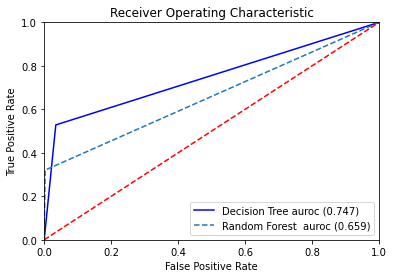

In [89]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(dt_fpr, dt_tpr, 'b', label = 'Decision Tree auroc (%.3f)'% dt_model_auc)
plt.plot(rf_fpr, rf_tpr, '--', label = 'Random Forest  auroc (%.3f)'% rf_model_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# Here the performance of a Decision Tree is better than Randome Forest but precison score of Random Forest is better 
# than Decision Tree and in this problem , precision has a mojor role , wo i will go with the model Random Forest.